In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# importing file using pandas

city_data = os.path.join('raw_data', 'city_data.csv')
ride_data = os.path.join('raw_data', 'ride_data.csv')

city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

#drop one duplicate record with same city name, same ride_ids but different bound to drivers
city_df = city_df.drop_duplicates('city', keep = 'first')

#merge
merged_df = city_df.merge(ride_df, on = 'city')

In [3]:
merged_df.head

<bound method NDFrame.head of                 city  driver_count   type                 date   fare  \
0         Kelseyland            63  Urban  2016-08-19 04:27:52   5.51   
1         Kelseyland            63  Urban  2016-04-17 06:59:50   5.54   
2         Kelseyland            63  Urban  2016-05-04 15:06:07  30.54   
3         Kelseyland            63  Urban  2016-01-25 20:44:56  12.08   
4         Kelseyland            63  Urban  2016-08-09 18:19:47  17.91   
5         Kelseyland            63  Urban  2016-10-24 15:15:46  33.56   
6         Kelseyland            63  Urban  2016-06-06 13:54:23  20.81   
7         Kelseyland            63  Urban  2016-08-10 07:02:40  44.53   
8         Kelseyland            63  Urban  2016-07-05 17:37:13  29.02   
9         Kelseyland            63  Urban  2016-04-25 02:18:31  20.05   
10        Kelseyland            63  Urban  2016-01-25 08:47:09   9.29   
11        Kelseyland            63  Urban  2016-11-10 01:57:14  20.58   
12        Kelseyland 

## RIDE SHARING BUBBLE PLOT


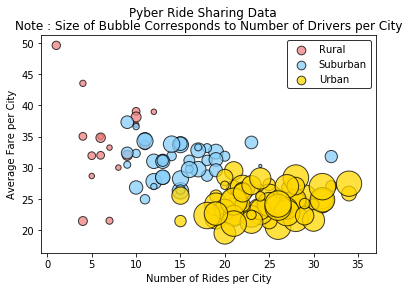

In [4]:
#group by city name
by_city = merged_df.groupby('city')

# variable holding avg fare by city
avg_fare = by_city.mean()['fare']

#variable holding rides by city
ride_count = by_city['ride_id'].count()

# number of drivers
driver_count = by_city.mean()['driver_count']

# city type data (urban, subrban & rural)
city_type = city_df.set_index('city')['type']

# dataframe derived from above.
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
})


city_info.sort_values('Number of Drivers', ascending = False)

#separated data frames according to  city types
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

#Color Dictionary and code
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

plt.suptitle('Pyber Ride Sharing Data')

# scatter plots for each city type
plt.scatter(rural['Number of Rides'], rural['Average Fare'], s = rural['Number of Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Number of Rides'], suburban['Average Fare'], s = suburban['Number of Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Number of Rides'], urban['Average Fare'], s = urban['Number of Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#print scatter plot
plt.title('Note : Size of Bubble Corresponds to Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Fare per City')



lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.show()

## BY CITY TYPE (TOTAL FARES)

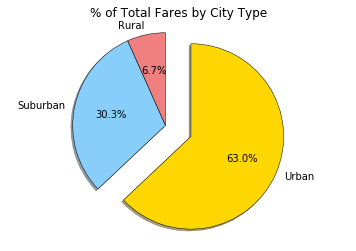

In [5]:
#group by city type to be used by all pie charts
by_city_type = merged_df.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = by_city_type.sum()['fare']

#pie chart build
labels = fare_sum.index

#colors and exploe the same for all pie charts, reference here
colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()

## BY CITY TYPE (TOTAL RIDES)

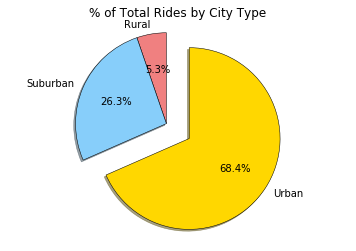

In [6]:
# number of ride per city type
ride_city_sum = by_city_type.count()['ride_id']

labels = ride_city_sum.index
plt.pie(ride_city_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

## BY CITY TYPE (DRIVERS)

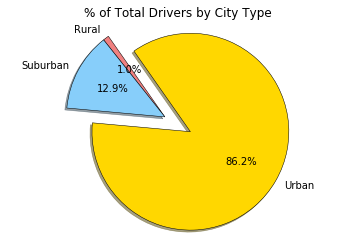

In [7]:
# of driver per city type
driver_city_sum = by_city_type.sum()['driver_count']

labels = driver_city_sum.index
plt.pie(driver_city_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()

## Conclusion and Analysis

* As it can be seen from above as well, Rural Areas had less drivers and riders of Pyber ride sharing, but there wasn't any well defined relationship to average fare. 

POSSIBLE REASON: varying distances of rides in rural areas or the supply of drivers in rural areas as drivers in rural areas only make up 1% of the total drivers. 

* With rural areas having the least amount of drivers per city and urban areas having more the number of drivers seems to increase with city classification. Surprisingly data points for urban areas that have similar number of drivers. A study could be conducted on Perhaps geographic size in relatonship to number of drivers, this can give us a better picture.

* A negative relationship is observed between the number of rides and the average fare. 

SUBURBAN VS URBAN city :(supply of drivers : the average distance a rider is travelling in these cities).

* Piechart observations indicate that cities make up for 63% and 68% of total fare and rides repectively, but the number of drivers in the city is 86.2% of the total drivers. 

POSSIBLE REASON: over supply or drivers in these cities causing lower prices. A similar, but less bearish trend is seen with suburban areas. 




